If you are running this on Google Colab, you need to uncomment (remove the `#`) and execute the following lines to install the Pyomo package, the solver, and some helper tools. If you are running this on Binder or elsewhere (e.g. your own computer) you can ignore this.

In [4]:
# !pip install pyomo==6.4.1
# !apt install glpk-utils
# !pip install "git+https://github.com/sjpfenninger/sen1511.git#egg=sen1511utils&subdirectory=sen1511utils"

In [5]:
import pyomo.environ as pyo

from sen1511utils import summarise_results

ImportError: cannot import name 'summarise_results' from 'sen1511utils' (unknown location)

# Assignment 2 - Mixed-integer linear programming (MILP)

## 4)

Consider three generating units and two demands. Each unit offers three blocks, while each demand bids four blocks. The technical characteristics of the generating units are given in the table as follows:

| Unit Data | Unit 1 | Unit 2 | Unit 3|
|:---|---:|---:|---:|
| Capacity (MW) | 30 | 25 | 25 |
| Minimum Power Output (MW) | 5 | 8 | 10 |
| Ramp up/down limit (MW/h) | 5 | 10 | 10 |
| Initial Status (on/off) | on | on | on |
| Initial power output (MW) | 10 | 15 | 10 |

Offers by generators and bids by demands are as follows:

| Offers | Unit 1 | Unit 2 | Unit 3|
|:---|---:|---:|---:|
| Block |  1 2 3  |  1 2 3   |  1 2 3   |
| Power (MW) | 5 12 13 |  8 8 9  | 10 10 5 |
| Price ($/MWh) | 1 3 3.5 | 4.5 5 6 |  8 9 10 |


| Bids | Demand 1 | Demand 2 |
|:---|---:|---:|
| Block |  1 2 3 4 |  1 2 3 4  | 
| Energy (MWh) | 6 5 5 3 |   5 4 4 3 |
| Price ($/MWh) | 20 15 7 4 | 18 16 11 3 |

Task 4.a) is solved on paper.

## 4.b)

Calculate the market clearing price and the social welfare in Python for the following cases:


## Case 4.b.1:
Minimum power output and ramping constraints are not taken into account

In [3]:
m = pyo.ConcreteModel(name = "Single-period auction")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

m.PG11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG31 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG32 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG33 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD14 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD24 = pyo.Var(domain=pyo.NonNegativeReals)
m.U1 = pyo.Var(domain=pyo.Binary)
m.U2 = pyo.Var(domain=pyo.Binary)
m.U3 = pyo.Var(domain=pyo.Binary)

##
# 2. Objective function
##

m.social_welfare = pyo.Objective(
    expr = (
        20 * m.PD11 + 15 * m.PD12 + 7 * m.PD13 + 4 * m.PD14 + 18 * m.PD21 + 16 * m.PD22 + 11 * m.PD23 + 3 * m.PD24 -
        (1 * m.PG11 + 3 * m.PG12+ 3.5 * m.PG13 + 4.5 * m.PG21 + 5 * m.PG22 + 6 * m.PG23 + 8 * m.PG31 + 9 * m.PG32 + 10 * m.PG33)),

    sense = pyo.maximize,
)

##
# 3. Constraints
##

# Demand and supply balance

m.demand = pyo.Constraint(expr = m.PD11 + m.PD12 + m.PD13 + m.PD14 + m.PD21 + m.PD22 + m.PD23 + m.PD24
    == m.PG11 + m.PG12 + m.PG13 + m.PG21 + m.PG22 + m.PG23 + m.PG31 + m.PG32 + m.PG33)

# Per-block demand and supply constraints
m.max_PG11 = pyo.Constraint(expr=m.PG11 <= 5)
m.max_PG12 = pyo.Constraint(expr=m.PG12 <= 12)
m.max_PG13 = pyo.Constraint(expr=m.PG13 <= 13)
m.max_PG21 = pyo.Constraint(expr=m.PG21 <= 8)
m.max_PG22 = pyo.Constraint(expr=m.PG22 <= 8)
m.max_PG23 = pyo.Constraint(expr=m.PG23 <= 9)
m.max_PG31 = pyo.Constraint(expr=m.PG31 <= 10)
m.max_PG32 = pyo.Constraint(expr=m.PG32 <= 10)
m.max_PG33 = pyo.Constraint(expr=m.PG33 <= 5)

m.max_PD11 = pyo.Constraint(expr=m.PD11 <= 6)
m.max_PD12 = pyo.Constraint(expr=m.PD12 <= 5)
m.max_PD13 = pyo.Constraint(expr=m.PD13 <= 5)
m.max_PD14 = pyo.Constraint(expr=m.PD14 <= 3)
m.max_PD21 = pyo.Constraint(expr=m.PD21 <= 5)
m.max_PD22 = pyo.Constraint(expr=m.PD22 <= 4)
m.max_PD23 = pyo.Constraint(expr=m.PD23 <= 4)
m.max_PD24 = pyo.Constraint(expr=m.PD24 <= 3)

# Per-plant minimum and maximum power output
m.binary_min_PG1 = pyo.Constraint(expr = m.U1 * 5 <= m.PG11 + m.PG12 + m.PG13)
m.binary_max_PG1 = pyo.Constraint(expr = m.PG11 + m.PG12 + m.PG13 <= m.U1 * 30)
m.binary_min_PG2 = pyo.Constraint(expr = m.U2 * 8 <= m.PG21 + m.PG22 + m.PG23)
m.binary_max_PG2 = pyo.Constraint(expr = m.PG21 + m.PG22 + m.PG23 <= m.U2 * 25)
m.binary_min_PG3 = pyo.Constraint(expr = m.U3 * 10 <= m.PG31 + m.PG32 + m.PG33)
m.binary_max_PG3 = pyo.Constraint(expr = m.PG31 + m.PG32 + m.PG33 <= m.U3 * 25)

# # Solve the problem
solver = pyo.SolverFactory('glpk')
solver.solve(m)

{'Problem': [{'Name': 'unknown', 'Lower bound': 345.5, 'Upper bound': 345.5, 'Number of objectives': 1, 'Number of constraints': 25, 'Number of variables': 21, 'Number of nonzeros': 59, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '1', 'Number of created subproblems': '1'}}, 'Error rc': 0, 'Time': 0.020703792572021484}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [4]:
summarise_results(m)

,Name,Value
0,social_welfare,345.500000
,Name,Value
0,PG11,5.000000
1,PG12,12.000000
2,PG13,13.000000
3,PG21,0.000000
4,PG22,0.000000
5,PG23,0.000000
6,PG31,0.000000
7,PG32,0.000000


## Case 4.b.2:
Minimum power output and ramping constraints are taken into account!

In [3]:
m = pyo.ConcreteModel(name = "Single-period auction")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

m.PG11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG31 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG32 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG33 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD14 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD24 = pyo.Var(domain=pyo.NonNegativeReals)
m.U1 = pyo.Var(domain=pyo.Binary)
m.U2 = pyo.Var(domain=pyo.Binary)
m.U3 = pyo.Var(domain=pyo.Binary)

##
# 2. Objective function
##

m.social_welfare = pyo.Objective(
    expr = (
        20 * m.PD11 + 15 * m.PD12 + 7 * m.PD13 + 4 * m.PD14 + 18 * m.PD21 + 16 * m.PD22 + 11 * m.PD23 + 3 * m.PD24 -
        (1 * m.PG11 + 3 * m.PG12+ 3.5 * m.PG13 + 4.5 * m.PG21 + 5 * m.PG22 + 6 * m.PG23 + 8 * m.PG31 + 9 * m.PG32 + 10 * m.PG33)),

    sense = pyo.maximize,
)

##
# 3. Constraints
##

# Demand and supply balance

m.demand = pyo.Constraint(expr = m.PD11 + m.PD12 + m.PD13 + m.PD14 + m.PD21 + m.PD22 + m.PD23 + m.PD24
    == m.PG11 + m.PG12 + m.PG13 + m.PG21 + m.PG22 + m.PG23 + m.PG31 + m.PG32 + m.PG33)

# Per-block demand and supply constraints
m.max_PG11 = pyo.Constraint(expr=m.PG11 <= 5)
m.max_PG12 = pyo.Constraint(expr=m.PG12 <= 12)
m.max_PG13 = pyo.Constraint(expr=m.PG13 <= 13)
m.max_PG21 = pyo.Constraint(expr=m.PG21 <= 8)
m.max_PG22 = pyo.Constraint(expr=m.PG22 <= 8)
m.max_PG23 = pyo.Constraint(expr=m.PG23 <= 9)
m.max_PG31 = pyo.Constraint(expr=m.PG31 <= 10)
m.max_PG32 = pyo.Constraint(expr=m.PG32 <= 10)
m.max_PG33 = pyo.Constraint(expr=m.PG33 <= 5)

m.max_PD11 = pyo.Constraint(expr=m.PD11 <= 6)
m.max_PD12 = pyo.Constraint(expr=m.PD12 <= 5)
m.max_PD13 = pyo.Constraint(expr=m.PD13 <= 5)
m.max_PD14 = pyo.Constraint(expr=m.PD14 <= 3)
m.max_PD21 = pyo.Constraint(expr=m.PD21 <= 5)
m.max_PD22 = pyo.Constraint(expr=m.PD22 <= 4)
m.max_PD23 = pyo.Constraint(expr=m.PD23 <= 4)
m.max_PD24 = pyo.Constraint(expr=m.PD24 <= 3)

# Per-plant minimum and maximum power output
m.binary_min_PG1 = pyo.Constraint(expr = m.U1 * 5 <= m.PG11 + m.PG12 + m.PG13)
m.binary_max_PG1 = pyo.Constraint(expr = m.PG11 + m.PG12 + m.PG13 <= m.U1 * 30)
m.binary_min_PG2 = pyo.Constraint(expr = m.U2 * 8 <= m.PG21 + m.PG22 + m.PG23)
m.binary_max_PG2 = pyo.Constraint(expr = m.PG21 + m.PG22 + m.PG23 <= m.U2 * 25)
m.binary_min_PG3 = pyo.Constraint(expr = m.U3 * 10 <= m.PG31 + m.PG32 + m.PG33)
m.binary_max_PG3 = pyo.Constraint(expr = m.PG31 + m.PG32 + m.PG33 <= m.U3 * 25)

# Ramping

# Initial power output for each generator
PG1_0 = 10; PG2_0 = 15; PG3_0 = 10

m.ramp_down_PG1 = pyo.Constraint(expr = PG1_0 - (m.PG11 + m.PG12 + m.PG13) <= 5)
m.ramp_up_PG1 = pyo.Constraint(expr = (m.PG11 + m.PG12 + m.PG13) - PG1_0 <= 5)

m.ramp_down_PG2 = pyo.Constraint(expr = PG2_0 - (m.PG21 + m.PG22 + m.PG23) <= 10)
m.ramp_up_PG2 = pyo.Constraint(expr = (m.PG21 + m.PG22 + m.PG23) - PG2_0 <= 10)

m.ramp_down_PG3 = pyo.Constraint(expr = PG3_0 - (m.PG31 + m.PG32 + m.PG33) <= 10)
m.ramp_up_PG3 = pyo.Constraint(expr = (m.PG31 + m.PG32 + m.PG33) - PG3_0 <= 10)

# # Solve the problem
solver = pyo.SolverFactory('glpk')
solver.solve(m)

{'Problem': [{'Name': 'unknown', 'Lower bound': 327.0, 'Upper bound': 327.0, 'Number of objectives': 1, 'Number of constraints': 31, 'Number of variables': 21, 'Number of nonzeros': 77, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '5', 'Number of created subproblems': '5'}}, 'Error rc': 0, 'Time': 0.02343916893005371}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

## A more "Pythonic" way to formulate 4.b)

In [5]:
##
# 0. Model data
##

from io import StringIO
import pandas as pd
from sen1511utils import display_side_by_side

set_units = [1, 2, 3]
set_generator_blocks = [11, 12, 13, 21, 22, 23, 31, 32, 33]
set_demand_blocks = [11, 12, 13, 14, 21, 22, 23, 24]

units = """
Unit,Capacity,Min power out,Ramp limit,Initial power
1,30,5,5,10
2,25,8,10,15
3,25,10,10,10
"""
data_units = pd.read_csv(StringIO(units), index_col=0)

generators = """
Block,Power,Price
11,5,1
12,12,3
13,13,3.5
21,8,4.5
22,8,5
23,9,6
31,10,8
32,10,9
33,5,10
"""
data_generators = pd.read_csv(StringIO(generators), index_col=0)

demands = """
Block,Energy,Price
11,6,20
12,5,15
13,5,7
14,3,4
21,5,18
22,4,16
23,4,11
24,3,3
"""
data_demands = pd.read_csv(StringIO(demands), index_col=0)

display_side_by_side([data_units, data_generators, data_demands], ["Units","Generators","Demands"])

In [6]:
m = pyo.ConcreteModel(name = "Single-period auction")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

m.PG = pyo.Var(set_generator_blocks, domain=pyo.NonNegativeReals)
m.PD = pyo.Var(set_demand_blocks, domain=pyo.NonNegativeReals)
m.U = pyo.Var(set_units, domain=pyo.Binary)

##
# 2. Objective function
##

m.social_welfare = pyo.Objective(
    expr = (
        sum(data_demands.loc[j, "Price"] * m.PD[j] for j in set_demand_blocks)
        - sum(data_generators.loc[i, "Price"] * m.PG[i] for i in set_generator_blocks)
    ),
    sense = pyo.maximize,
)

##
# 3. Constraints
##

m.demand = pyo.Constraint(expr = sum(m.PD[j] for j in set_demand_blocks) == sum(m.PG[i] for i in set_generator_blocks))
m.max_PG = pyo.Constraint(set_generator_blocks, rule=lambda m, i: m.PG[i] <= data_generators.loc[i, "Power"])
m.max_PD = pyo.Constraint(set_demand_blocks, rule=lambda m, i: m.PD[i] <= data_demands.loc[i, "Energy"])


# Per-plant minimum and maximum power output
m.binary_min_PG = pyo.Constraint(
    set_units,
    rule=lambda m, i: m.U[i] * data_units.loc[i, "Min power out"] <= sum(m.PG[10*i+j] for j in [1, 2, 3])
)
m.binary_max_PG = pyo.Constraint(
    set_units,
    rule=lambda m, i: sum(m.PG[10*i+j] for j in [1, 2, 3]) <= m.U[i] * data_units.loc[i, "Capacity"]
)

# Ramping
m.ramp_down = pyo.Constraint(
    set_units,
    rule=lambda m, i: data_units.loc[i, "Initial power"] - sum(m.PG[10*i+j] for j in [1, 2, 3]) <=  data_units.loc[i, "Ramp limit"]
)
m.ramp_up = pyo.Constraint(
    set_units,
    rule=lambda m, i: sum(m.PG[10*i+j] for j in [1, 2, 3]) - data_units.loc[i, "Initial power"] <=  data_units.loc[i, "Ramp limit"]
)

# # Solve the problem
solver = pyo.SolverFactory('glpk')
solver.solve(m)


{'Problem': [{'Name': 'unknown', 'Lower bound': 327.0, 'Upper bound': 327.0, 'Number of objectives': 1, 'Number of constraints': 31, 'Number of variables': 21, 'Number of nonzeros': 77, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': '5', 'Number of created subproblems': '5'}}, 'Error rc': 0, 'Time': 0.007295846939086914}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [7]:
summarise_results(m)

,Name,Value
0,social_welfare,327.000000
,Name,Value
0,PG[11],5.000000
1,PG[12],10.000000
2,PG[13],0.000000
3,PG[21],8.000000
4,PG[22],6.000000
5,PG[23],0.000000
6,PG[31],0.000000
7,PG[32],0.000000


## I do not know which question is this one

## Getting shadow prices

To get shadow prices, we turn the model from MILP to LP by turning the integer variables from the MILP solution into fixed model parameters with the value they had in the optimal solution, simply replacing:

```python
m.U1 = pyo.Var(domain=pyo.Binary)
m.U2 = pyo.Var(domain=pyo.Binary)
m.U3 = pyo.Var(domain=pyo.Binary)
```

with:

```python
m.U1 = 1
m.U2 = 1
m.U3 = 0
```

In [8]:
m = pyo.ConcreteModel(name = "Single-period auction")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

m.PG11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG31 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG32 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG33 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD14 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PD24 = pyo.Var(domain=pyo.NonNegativeReals)
m.U1 = 1
m.U2 = 1
m.U3 = 0

##
# 2. Objective function
##

m.social_welfare = pyo.Objective(
    expr = (
        20 * m.PD11 + 15 * m.PD12 + 7 * m.PD13 + 4 * m.PD14 + 18 * m.PD21 + 16 * m.PD22 + 11 * m.PD23 + 3 * m.PD24 -
        (1 * m.PG11 + 3 * m.PG12+ 3.5 * m.PG13 + 4.5 * m.PG21 + 5 * m.PG22 + 6 * m.PG23 + 8 * m.PG31 + 9 * m.PG32 + 10 * m.PG33)),

    sense = pyo.maximize,
)

##
# 3. Constraints
##

# Demand and supply balance

m.demand = pyo.Constraint(expr = m.PD11 + m.PD12 + m.PD13 + m.PD14 + m.PD21 + m.PD22 + m.PD23 + m.PD24
    == m.PG11 + m.PG12 + m.PG13 + m.PG21 + m.PG22 + m.PG23 + m.PG31 + m.PG32 + m.PG33)

# Per-block demand and supply constraints
m.max_PG11 = pyo.Constraint(expr=m.PG11 <= 5)
m.max_PG12 = pyo.Constraint(expr=m.PG12 <= 12)
m.max_PG13 = pyo.Constraint(expr=m.PG13 <= 13)
m.max_PG21 = pyo.Constraint(expr=m.PG21 <= 8)
m.max_PG22 = pyo.Constraint(expr=m.PG22 <= 8)
m.max_PG23 = pyo.Constraint(expr=m.PG23 <= 9)
m.max_PG31 = pyo.Constraint(expr=m.PG31 <= 10)
m.max_PG32 = pyo.Constraint(expr=m.PG32 <= 10)
m.max_PG33 = pyo.Constraint(expr=m.PG33 <= 5)

m.max_PD11 = pyo.Constraint(expr=m.PD11 <= 6)
m.max_PD12 = pyo.Constraint(expr=m.PD12 <= 5)
m.max_PD13 = pyo.Constraint(expr=m.PD13 <= 5)
m.max_PD14 = pyo.Constraint(expr=m.PD14 <= 3)
m.max_PD21 = pyo.Constraint(expr=m.PD21 <= 5)
m.max_PD22 = pyo.Constraint(expr=m.PD22 <= 4)
m.max_PD23 = pyo.Constraint(expr=m.PD23 <= 4)
m.max_PD24 = pyo.Constraint(expr=m.PD24 <= 3)

# Per-plant minimum and maximum power output
m.binary_min_PG1 = pyo.Constraint(expr = m.U1 * 5 <= m.PG11 + m.PG12 + m.PG13)
m.binary_max_PG1 = pyo.Constraint(expr = m.PG11 + m.PG12 + m.PG13 <= m.U1 * 30)
m.binary_min_PG2 = pyo.Constraint(expr = m.U2 * 8 <= m.PG21 + m.PG22 + m.PG23)
m.binary_max_PG2 = pyo.Constraint(expr = m.PG21 + m.PG22 + m.PG23 <= m.U2 * 25)
m.binary_min_PG3 = pyo.Constraint(expr = m.U3 * 10 <= m.PG31 + m.PG32 + m.PG33)
m.binary_max_PG3 = pyo.Constraint(expr = m.PG31 + m.PG32 + m.PG33 <= m.U3 * 25)

# Ramping

# Initial power output for each generator
PG1_0 = 10; PG2_0 = 15; PG3_0 = 10

m.ramp_down_PG1 = pyo.Constraint(expr = PG1_0 - (m.PG11 + m.PG12 + m.PG13) <= 5)
m.ramp_up_PG1 = pyo.Constraint(expr = (m.PG11 + m.PG12 + m.PG13) - PG1_0 <= 5)

m.ramp_down_PG2 = pyo.Constraint(expr = PG2_0 - (m.PG21 + m.PG22 + m.PG23) <= 10)
m.ramp_up_PG2 = pyo.Constraint(expr = (m.PG21 + m.PG22 + m.PG23) - PG2_0 <= 10)

m.ramp_down_PG3 = pyo.Constraint(expr = PG3_0 - (m.PG31 + m.PG32 + m.PG33) <= 10)
m.ramp_up_PG3 = pyo.Constraint(expr = (m.PG31 + m.PG32 + m.PG33) - PG3_0 <= 10)

# # Solve the problem
solver = pyo.SolverFactory('glpk')
solver.solve(m)

{'Problem': [{'Name': 'unknown', 'Lower bound': 327.0, 'Upper bound': 327.0, 'Number of objectives': 1, 'Number of constraints': 31, 'Number of variables': 18, 'Number of nonzeros': 71, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.010318756103515625}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [9]:
summarise_results(m)

,Name,Value
0,social_welfare,327.000000
,Name,Value
0,PG11,5.000000
1,PG12,10.000000
2,PG13,0.000000
3,PG21,8.000000
4,PG22,6.000000
5,PG23,0.000000
6,PG31,0.000000
7,PG32,0.000000


## 5) Unit Commitment and Mixed Integer Programming

Formulate Multiperiod Unit Commitment problem for four periods to satisfy the expected demand given below:

| Period | PtD (MW) | 
|:---|---:|
| 1 | 40 | 
| 2 | 250 | 
| 3 | 300 |
| 4 | 600| 

and the following known characteristics of the three production units:

# <center>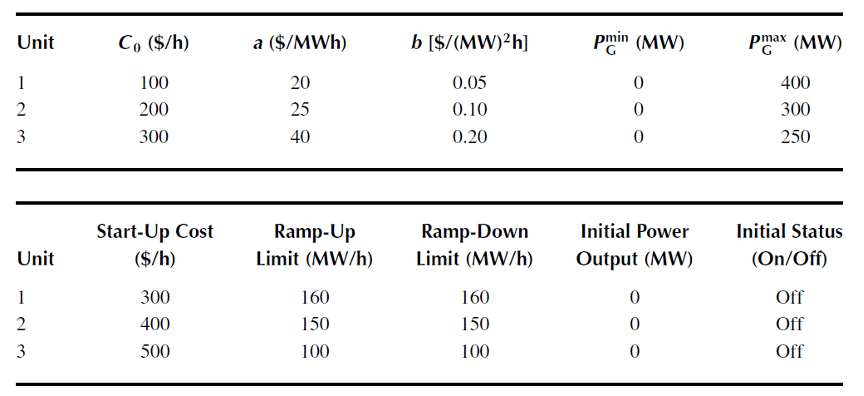


Note: b)	After the problem formulation for Case 5.a.1 is done and the implementation in Python is finished, formulate two new cases for this problem and solve them in Python:

# Case 5.b.1
UC with including start-up costs and ramping limits!

In [1]:
##
# 0. Model data
##

from io import StringIO
import pandas as pd
from sen1511utils import display_side_by_side

set_units = [1, 2, 3]
set_period = [1, 2, 3, 4]
set_generation_level = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34]

units = """
Unit,C0,a,b,PGmin,PGmax,CSU,RampUp,RampDown,InitialPower, InitialStatus 
1,100,20,0.05,0,400,300,160,160,0,0
2,200,25,0.10,0,300,400,150,150,0,0
3,300,40,0.20,0,250,500,100,100,0,0
"""
data_units = pd.read_csv(StringIO(units), index_col=0)

demands = """
Period,Energy
1,40
2,250
3,300
4,600

"""
data_demands = pd.read_csv(StringIO(demands), index_col=0)

display_side_by_side([data_units, data_demands], ["Units","Demands"])

ImportError: cannot import name 'display_side_by_side' from 'sen1511utils' (unknown location)

In [ ]:
m = pyo.ConcreteModel(name = "Unit Commitment and Mixed Integer Programming")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

m.PG11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG14 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG24 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG31 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG32 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG33 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG34 = pyo.Var(domain=pyo.NonNegativeReals)

m.U11 = pyo.Var(domain=pyo.Binary)
m.U12 = pyo.Var(domain=pyo.Binary)
m.U13 = pyo.Var(domain=pyo.Binary)
m.U14 = pyo.Var(domain=pyo.Binary)
m.U21 = pyo.Var(domain=pyo.Binary)
m.U22 = pyo.Var(domain=pyo.Binary)
m.U23 = pyo.Var(domain=pyo.Binary)
m.U24 = pyo.Var(domain=pyo.Binary)
m.U31 = pyo.Var(domain=pyo.Binary)
m.U32 = pyo.Var(domain=pyo.Binary)
m.U33 = pyo.Var(domain=pyo.Binary)
m.U34 = pyo.Var(domain=pyo.Binary)

##
# 2. Objective function
##

for i in range 
m.social_welfare = pyo.Objective(
    expr = (
        sum(data_demands.loc[j, "Price"] * m.PD[j] for j in set_demand_blocks)
        - sum(data_generators.loc[i, "Price"] * m.PG[i] for i in set_generator_blocks)
    ),
    sense = pyo.maximize,
)

m.social_welfare = pyo.Objective(
    expr = (
        20 * m.PD11 + 15 * m.PD12 + 7 * m.PD13 + 4 * m.PD14 + 18 * m.PD21 + 16 * m.PD22 + 11 * m.PD23 + 3 * m.PD24 -
        (1 * m.PG11 + 3 * m.PG12+ 3.5 * m.PG13 + 4.5 * m.PG21 + 5 * m.PG22 + 6 * m.PG23 + 8 * m.PG31 + 9 * m.PG32 + 10 * m.PG33)),

    sense = pyo.maximize,
)

##
# 3. Constraints
##

# Demand and supply balance

m.demand = pyo.Constraint(expr = m.PD11 + m.PD12 + m.PD13 + m.PD14 + m.PD21 + m.PD22 + m.PD23 + m.PD24
    == m.PG11 + m.PG12 + m.PG13 + m.PG21 + m.PG22 + m.PG23 + m.PG31 + m.PG32 + m.PG33)

# Per-block demand and supply constraints
m.max_PG11 = pyo.Constraint(expr=m.PG11 <= 5)
m.max_PG12 = pyo.Constraint(expr=m.PG12 <= 12)
m.max_PG13 = pyo.Constraint(expr=m.PG13 <= 13)
m.max_PG21 = pyo.Constraint(expr=m.PG21 <= 8)
m.max_PG22 = pyo.Constraint(expr=m.PG22 <= 8)
m.max_PG23 = pyo.Constraint(expr=m.PG23 <= 9)
m.max_PG31 = pyo.Constraint(expr=m.PG31 <= 10)
m.max_PG32 = pyo.Constraint(expr=m.PG32 <= 10)
m.max_PG33 = pyo.Constraint(expr=m.PG33 <= 5)

m.max_PD11 = pyo.Constraint(expr=m.PD11 <= 6)
m.max_PD12 = pyo.Constraint(expr=m.PD12 <= 5)
m.max_PD13 = pyo.Constraint(expr=m.PD13 <= 5)
m.max_PD14 = pyo.Constraint(expr=m.PD14 <= 3)
m.max_PD21 = pyo.Constraint(expr=m.PD21 <= 5)
m.max_PD22 = pyo.Constraint(expr=m.PD22 <= 4)
m.max_PD23 = pyo.Constraint(expr=m.PD23 <= 4)
m.max_PD24 = pyo.Constraint(expr=m.PD24 <= 3)

# Per-plant minimum and maximum power output
m.binary_min_PG1 = pyo.Constraint(expr = m.U1 * 5 <= m.PG11 + m.PG12 + m.PG13)
m.binary_max_PG1 = pyo.Constraint(expr = m.PG11 + m.PG12 + m.PG13 <= m.U1 * 30)
m.binary_min_PG2 = pyo.Constraint(expr = m.U2 * 8 <= m.PG21 + m.PG22 + m.PG23)
m.binary_max_PG2 = pyo.Constraint(expr = m.PG21 + m.PG22 + m.PG23 <= m.U2 * 25)
m.binary_min_PG3 = pyo.Constraint(expr = m.U3 * 10 <= m.PG31 + m.PG32 + m.PG33)
m.binary_max_PG3 = pyo.Constraint(expr = m.PG31 + m.PG32 + m.PG33 <= m.U3 * 25)

# # Solve the problem
solver = pyo.SolverFactory('glpk')
solver.solve(m)

# Case 5.b.2 
UC with including start-up cost, ramping limits and with reserve constraints. The reserve imposed, PRt, should be higher than or equal to 20% of the demand.

In [ ]:
m = pyo.ConcreteModel(name = "Unit Commitment and Mixed Integer Programming Case 2")
m.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)

##
# 1. Decision variables
##

m.PG11 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG12 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG13 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG14 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG21 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG22 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG23 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG24 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG31 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG32 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG33 = pyo.Var(domain=pyo.NonNegativeReals)
m.PG34 = pyo.Var(domain=pyo.NonNegativeReals)

m.CSU11 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU12 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU13 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU14 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU21 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU22 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU23 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU24 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU31 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU32 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU33 = pyo.Var(domain=pyo.NonNegativeReals)
m.CSU34 = pyo.Var(domain=pyo.NonNegativeReals)

m.U11 = pyo.Var(domain=pyo.Binary)
m.U12 = pyo.Var(domain=pyo.Binary)
m.U13 = pyo.Var(domain=pyo.Binary)
m.U14 = pyo.Var(domain=pyo.Binary)
m.U21 = pyo.Var(domain=pyo.Binary)
m.U22 = pyo.Var(domain=pyo.Binary)
m.U23 = pyo.Var(domain=pyo.Binary)
m.U24 = pyo.Var(domain=pyo.Binary)
m.U31 = pyo.Var(domain=pyo.Binary)
m.U32 = pyo.Var(domain=pyo.Binary)
m.U33 = pyo.Var(domain=pyo.Binary)
m.U34 = pyo.Var(domain=pyo.Binary)




